# Welcome to Assignment 1 on course CV_CSL442_S21

## <span style='color:red'> ***Instructions:***</span>
#### <span style='color:red'>1. Use Python 3.x, jupyter notebook to run this notebook.</span>
#### <span style='color:red'>2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE' you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.</span>
#### <span style='color:red'>3. Read documentation of each function carefully.</span>
#### <span style='color:red'>4. Out of 7 questions we consider best 5 for the evaluation purpose.</span>
#### <span style='color:red'>5. Copying assignment solutions from others is strongly discouraged and will be considered as violation of academic code of conduct.</span>
#### <span style='color:red'>6. Early submitted assignment solutions will be considered for evaluation, so students please check your solutions carefully before submission.</span>
#### <span style='color:red'>7. Required two items for submission:</span>
    1. Solutions jupyter notebook file.
    2. Link to the recorded video of your program explanation and output demo. Try to keep the video duration minimum (preferably 10-15min).
#### <span style='color:red'>8. All the submissions should be submitted only in teams. Assignmnet due date is 15.2.2021 before 5:00PM. Late submission is accepted till 16.2.2021 before 5:00PM with 2 marks penalty from the accquired marks.</span>
#### <span style='color:blue'>***-:All the best:-***</span>

<span style='color:red'>1Q. Using basic image operations combine the scene and object images to get the composite image as shown below.</span>

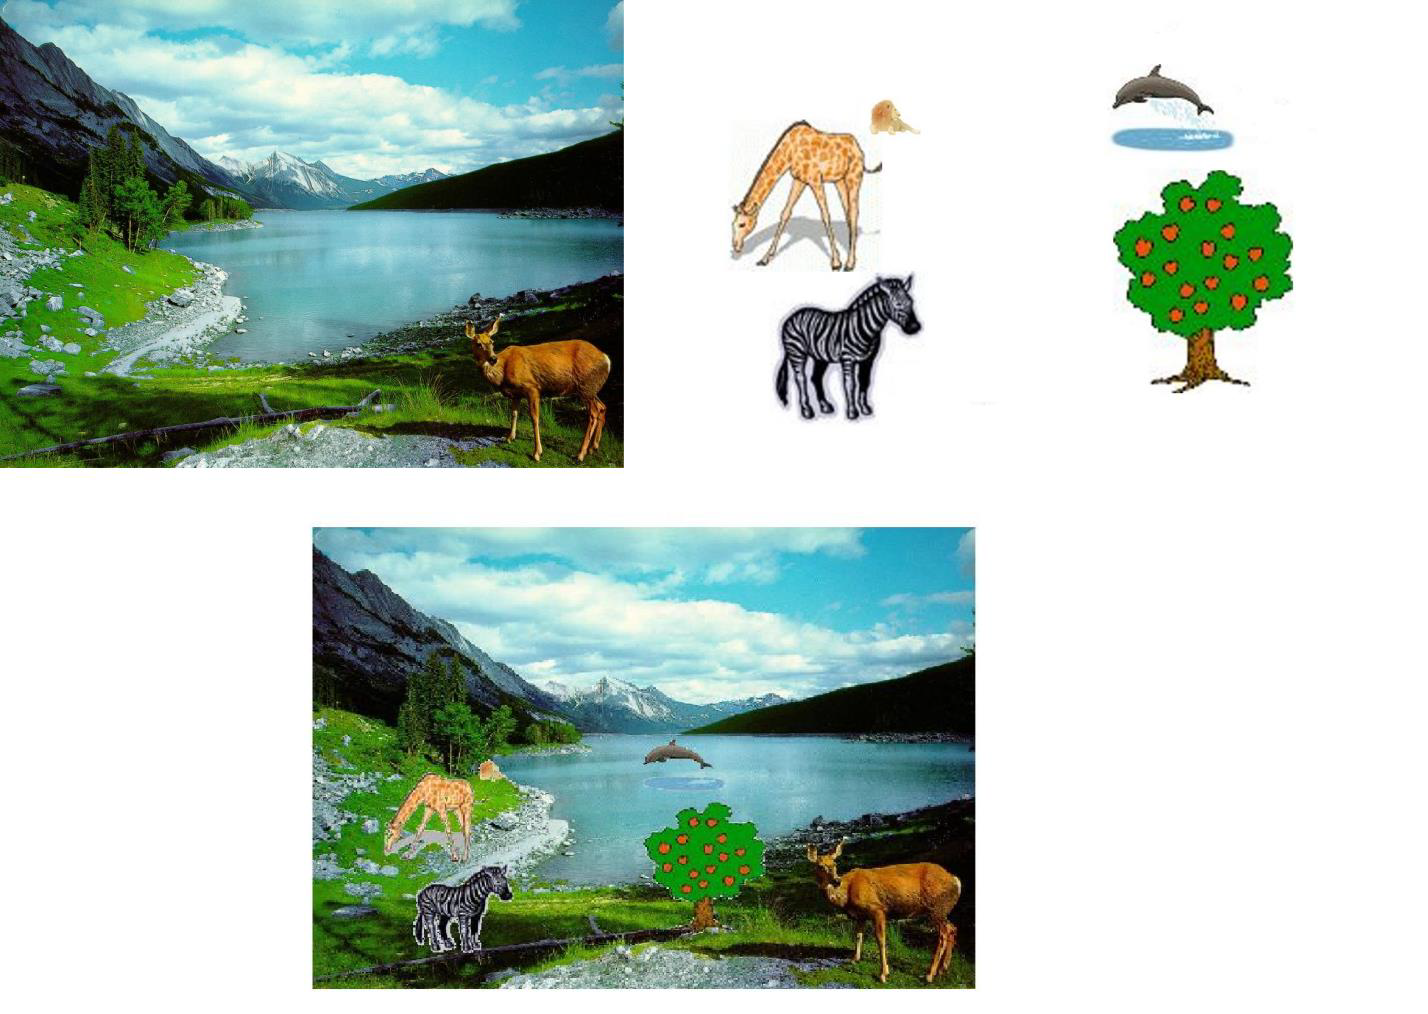

([], [])

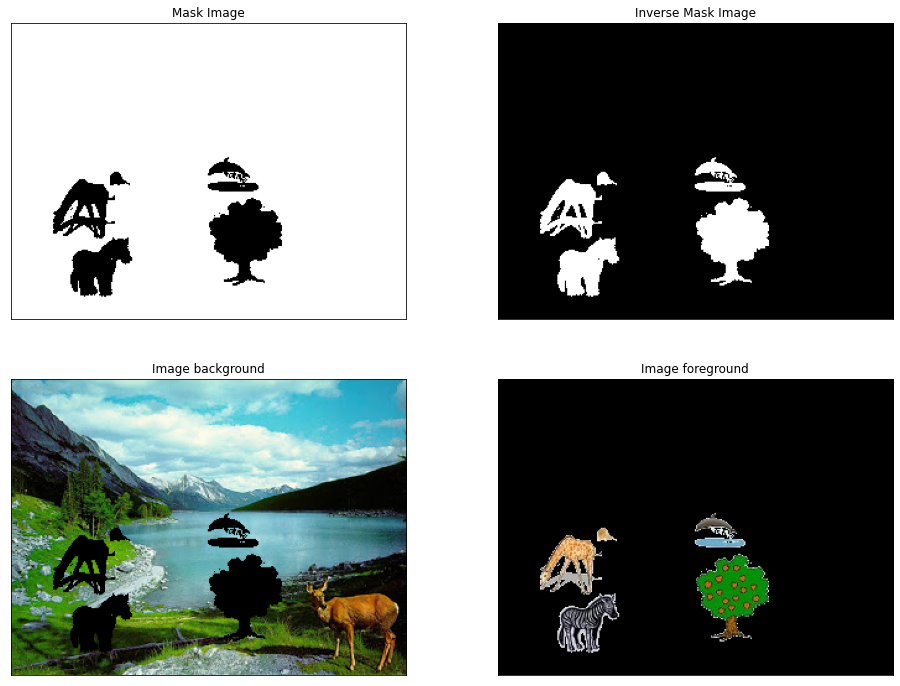

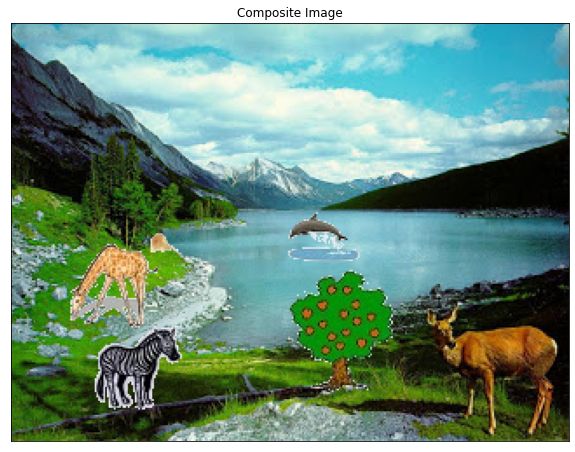

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img1 = cv2.imread("img61.jpg")
img2 = cv2.imread("Sample_Image.jpg")

#YOUR CODE STARTS HERE

img2_grey = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)                           #converting to grayscale image
    
ret, mask = cv2.threshold(img2_grey,240,255,cv2.THRESH_BINARY)             #creating mask image using Thresh_Binary    


ret, mask_inv = cv2.threshold(img2_grey,240,255,cv2.THRESH_BINARY_INV)      #inverted case of THRESH_BINARY


img_background = cv2.bitwise_and(img1,img1,mask = mask)                    

img_foreground = cv2.bitwise_and(img2,img2,mask = mask_inv)

res_img = cv2.add(img_background,img_foreground)
#YOUR CODE ENDS HERE

mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
mask_inv=cv2.cvtColor(mask_inv,cv2.COLOR_BGR2RGB)
img_background=cv2.cvtColor(img_background,cv2.COLOR_BGR2RGB)
img_foreground=cv2.cvtColor(img_foreground,cv2.COLOR_BGR2RGB)
res_img=cv2.cvtColor(res_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(mask)
plt.title('Mask Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(mask_inv)
plt.title('Inverse Mask Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(img_background)
plt.title('Image background')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,4)
plt.imshow(img_foreground)
plt.title('Image foreground')
plt.xticks([])
plt.yticks([])
plt.figure(figsize=(10,8))
plt.subplot(1,1,1)
plt.imshow(res_img)
plt.title('Composite Image')
plt.xticks([])
plt.yticks([])

<span style='color:red'>2Q. Implement a function domIntensity(im, k), which takes an image im and an integer k and returns a list of k most dominant intensities of that image. Experiment your code on any 3 images to validate the program output.</span>

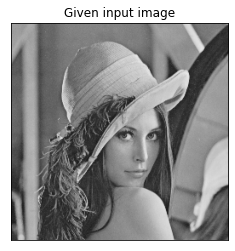

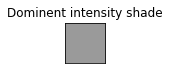

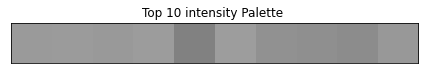

In [1]:
import cv2
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

def domIntensity(im, k):
    #YOUR CODE STARTS HERE
    d1 = {}
    for i in range(256):
        d1[i] = 0                      #initialising step 
    
    for x in im:
        for y in x:
            b = y[0]
            d1[b] = d1[b] + 1          #counting occurences of each intensity value
    
    
    sorted_d = dict( sorted(d1.items(), key=operator.itemgetter(1),reverse=True))     #sort on basis of occurences of 
                                                                                      #intensites in reverse order

    temp = list(sorted_d.keys())                          #conversion to list 
        
    sorted_intensities = []
    
    for i in temp:
        ele = [i ,i, i]                                   #same value to each channels i.e R,G,B
        sorted_intensities.append(ele)
    
    

    #YOUR CODE ENDS HERE
    return sorted_intensities[:k]                        #return top K intensity values

def displayIntensityPalette(im, dom_list):
    plt.figure()
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray")
    else:
        plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Given input image")
    k = len(dom_list)
    # Most dominant intensity
    top_im = np.array([[(dom_list[0])]])
    plt.figure(figsize = (0.75,0.75), frameon=False)
    plt.imshow(top_im)
    plt.title('Dominent intensity shade')
    plt.xticks([])
    plt.yticks([])
    # k most dominant intensity palette
    plt.figure(figsize = ((0.75*k),0.75), frameon=False)
    dom_inty_im = np.array([[(dom_list[i]) for i in range(k)]])
    plt.imshow(dom_inty_im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Top 10 intensity Palette ")

im = cv2.imread("lena_gray_256.jpg")
dom_list = domIntensity(im,10)
displayIntensityPalette(im, dom_list)

<span style='color:red'>3Q. Write a function <span style='color:blue'>histogramEqualization(image)</span> to stretch the image contrast. Using this function enhance the images histogram1.jpg, histogram2.jpg and histogram3.jpg and compare it with inbuilt function results. Record the observations.</span> 

<Figure size 1152x864 with 0 Axes>

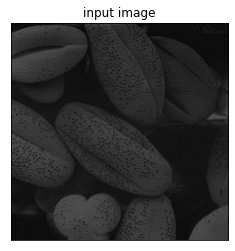

<Figure size 1152x864 with 0 Axes>

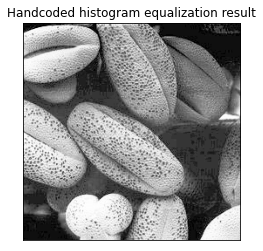

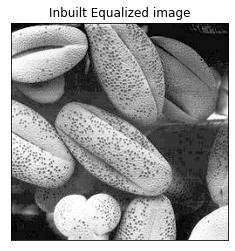

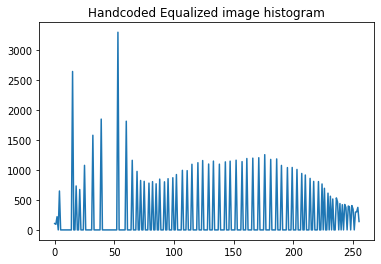

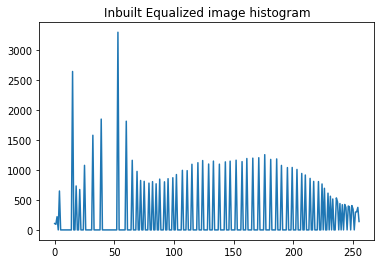

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def plotHistogram(im):
    #YOUR CODE STARTS HERE
    img = np.reshape(im,-1)        #converting it into 1D array
    
    imgHist = np.zeros(256, dtype = 'uint16')    #creating an array of size 256 of datatype "int" with initialised value 0
    
    for x in img:
        imgHist[x] = imgHist[x] + 1              #counting the occurences of each intensity value in Histogram

    #YOUR CODE ENDS HERE
    return imgHist

def histogramEqualization(im):
    #YOUR CODE STARTS HERE
    imgHist = plotHistogram(im)                #getting the histogram for the image

    
    total_no_of_pixels = im.shape[0]*im.shape[1]      #calculating M*N
    
    imgHist = imgHist / total_no_of_pixels           #to determine probability
    
    running_sum = np.zeros(256, dtype = 'double')     #creating an array to store cdf (running sum)
    
    running_sum[0] = imgHist[0]                       
    
    for i in range(1,256):
        running_sum[i] = running_sum[i-1] + imgHist[i]   #calculating running sum for each intensity
        
    running_sum = running_sum*255                        # Multiply by (l-1)
    
    for i in range(0,256):
        running_sum[i] = round(running_sum[i])          #rounding to near integer value for ploting histogram          
    
    img = np.reshape(im,-1)                            #reshaping into 1-D array
    
    for j in range(total_no_of_pixels):
        img[j] = running_sum[img[j]]                  #storing new tranformed value for each pixel
    
    im_new = np.reshape(img,im.shape)                 #reshaping back to original shape
        


    #YOUR CODE ENDS HERE
    return im_new                                     #returning the new_tranformed image

he = cv2.imread('histogram3.jpg',0)
he1=cv2.cvtColor(he,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(he1)
plt.xticks([])
plt.yticks([])

# Implemented
eq_img= histogramEqualization(he)
hist=plotHistogram(eq_img)
eq_img=cv2.cvtColor(eq_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("Handcoded histogram equalization result")
plt.imshow(eq_img)
plt.xticks([])
plt.yticks([])

#inbuilt
inbuilt_hist_img=cv2.equalizeHist(he)
inbuilt_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Inbuilt Equalized image")
plt.imshow(inbuilt_hist_img, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("Handcoded Equalized image histogram")
#plt.bar(range(256),hist)
plt.plot(hist)
plt.show()
plt.figure()
plt.title("Inbuilt Equalized image histogram")
plt.plot(inbuilt_hist)
plt.show()

<span style='color:red'>4Q.Images of outdoor scenes are often degraded by haze (due to fog, dust, etc). Light is attenuated by its passage through the atmosphere, and additional unwanted scattered light is added. We want to enhance the images to remove the effect of the haze. Look at input histograms of images “haze1.tif” and “haze2.tif”. Let’s assume that the pixels in the degraded image that have the lowest values (in each color band) actually should be pure black, and the pixels that have the highest values (in each color band) are actually should be pure white. A simple de-hazing algorithm is to take a color image, and for each band (red, green, blue), stretch its values to occupy the full range (0 to 255), such that 1% of data at the extreme ends is saturated at the low and high values (see Matlab’s “imadjust”). Then put the bands back together into an RGB image. Implement this algorithm and test it on the given images.</span>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# YOUR CODE STARTS HERE

    
    

    
    
# YOUR CODE ENDS HERE

<span style='color:red'>5Q. Try to enhance the ‘skeleton.jpg’ image by performing the sequence of operations given as comments in the program. make note of the observations in each step. </span>
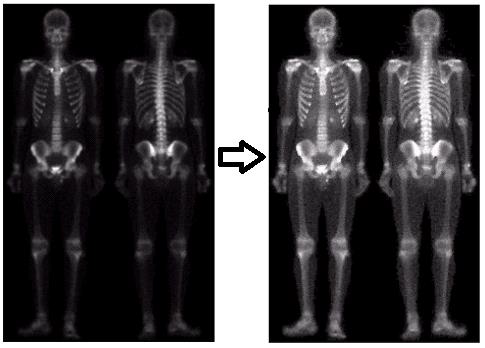

([], [])

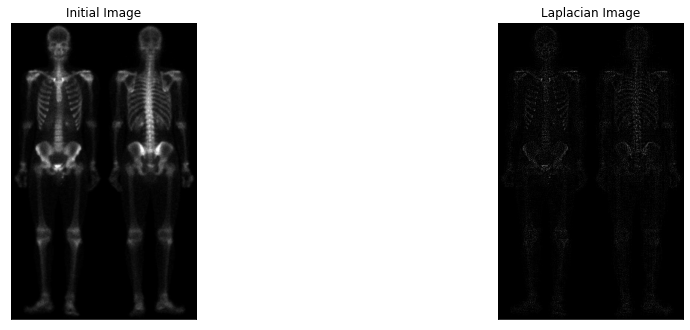

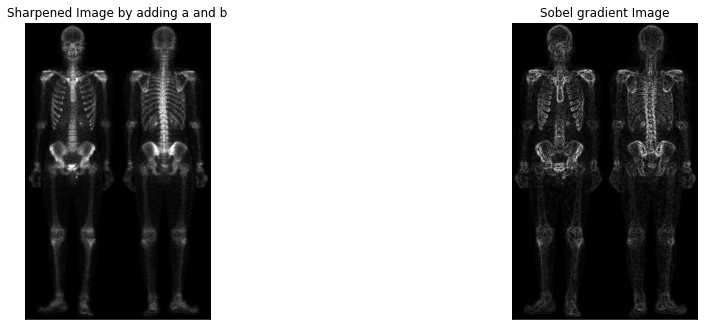

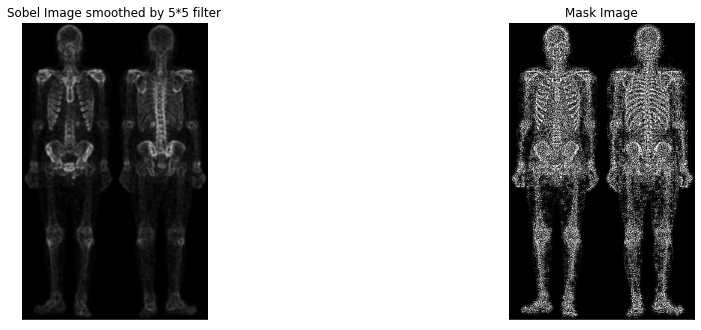

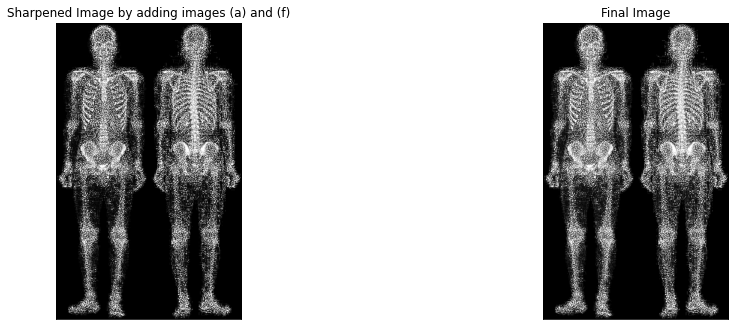

In [5]:
# Question 5: Sequence of steps to enhance the image.

#1. (a).read image of whole body bone scan.
#2. (b) Laplacian of (a).
#3. (c) Sharpened image obtained by adding (a) and (b).
#4. (d) Sobel gradient of image (a).
#5. (e) Sobel image smoothed with a 5 × 5 box filter.
#6. (f) Mask image formed by the product of (b) and (e).
#7. (g) Sharpened image obtained by the adding images (a) and (f).
#8. (h) Final result obtained by applying a power-law transformation to (g).

#YOUR CODE STARTS HERE
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


ddepth = cv2.CV_32F
kernel_size = 3
img = cv2.imread("skeleton.tif")                      #Reading the image 
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       # converting into gray image
im_gray = im_gray.astype('uint8')

filter = np.array([[-1,-1,-1],                        #Laplacian filter
                [-1,8,-1],
                [-1,-1,-1]])

lap = cv2.filter2D(im_gray, -1, filter)              #Applying that filter to get laplacian image
abs_lap = cv2.convertScaleAbs(lap)                   #converting into absolute scale

sharp = cv2.add(im_gray,abs_lap)                     #Sharpened image obtained by adding (a) and (b).

grad_x = np.absolute(cv2.Sobel(im_gray, ddepth, 1, 0, ksize=kernel_size))   #sobel_gradient in x direction
grad_y = np.absolute(cv2.Sobel(im_gray, ddepth, 0, 1, ksize=kernel_size))   #sobel_gradient in y direction



grad = np.sqrt(grad_x*grad_x + grad_y*grad_y)                 #producing the gradient magnitude
grad = grad.astype('uint8') 

sobel_img = cv2.blur(grad,(5,5))                             #Sobel image smoothed with a 5 × 5 box filter


mask = cv2.multiply(sobel_img,abs_lap)                      #producing mask image


sharpened_img = cv2.add(im_gray,mask)                      #Sharpened image obtained by the adding images (a) and (f) 


new_img = ((sharpened_img/255)**0.8)*255                   #applying power-law transformation sigma = 0.8
new_img = new_img.astype('uint8')



plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Initial Image')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
abs_lap = cv2.cvtColor(abs_lap, cv2.COLOR_BGR2RGB)
plt.imshow(abs_lap)
plt.title('Laplacian Image')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sharp = cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)
plt.imshow(sharp)
plt.title('Sharpened Image by adding a and b')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
grad = cv2.cvtColor(grad, cv2.COLOR_BGR2RGB)
plt.imshow(grad)
plt.title('Sobel gradient Image')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sobel_img = cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB)
plt.imshow(sobel_img)
plt.title('Sobel Image smoothed by 5*5 filter')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
plt.title('Mask Image')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sharpened_img = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB)
plt.imshow(sharpened_img)
plt.title('Sharpened Image by adding images (a) and (f)')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
plt.title('Final Image')
plt.xticks([])
plt.yticks([])

#YOUR CODE ENDS HERE

<span style='color:red'>6Q. Write a program to find the largest correlation spot in the given image (hills.jpg) using linear filtering based template matching technique. Draw rectangular bounding box at the detected template (template.png) matched locations.</span>

([], [])

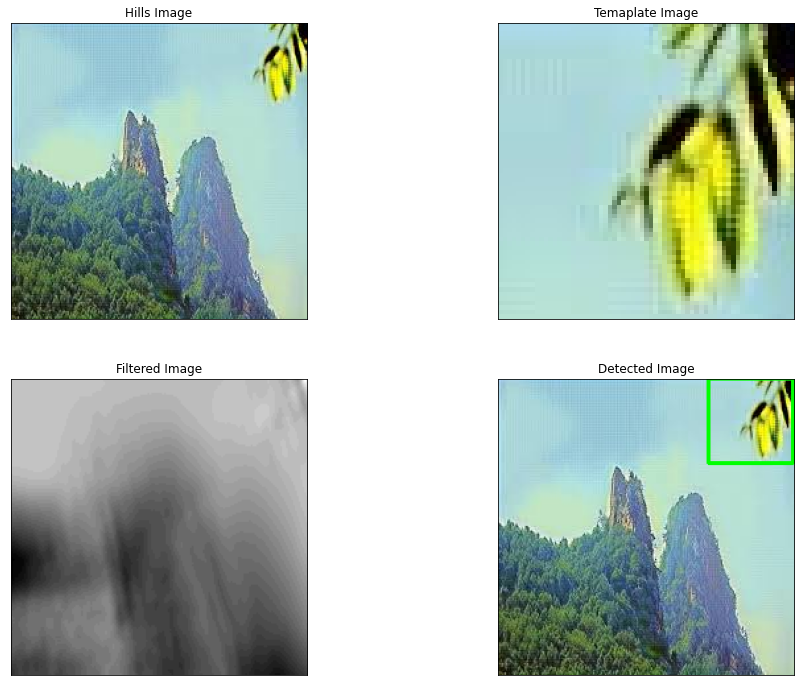

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Implement Linear Filtering technique on an image using a linear filter #correlation
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)    # converts image to gray scale, so that it is easy to apply filter
    #image = np.array(image.convert('L'))
    image_height, image_width = image.shape[0], image.shape[1] #getting image height and width
    
    filter_ = cv2.cvtColor(filter_,cv2.COLOR_BGR2GRAY)  # converts filter to gray scale, so that it is easy to apply filter
    #filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]  #getting filter height and width

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1  #result height and width
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])   
    # YOUR CODE STARTS HERE
    
    start_row = int(filter_height/2)  #starting row position in image to apply correlation
    start_col = int(filter_width/2)   #starting column position in image to apply correlation
    end_row = image_height - start_row  #ending row position
    end_col = image_width - start_col    #ending column position
    
    global max_val                       #global variables to store largest correlation spot in the  image
    global rx
    global ry
    
    filter_ = filter_.astype('float')
    
    for i in range(start_row,end_row):
        for j in range(start_col,end_col):
            sub_mat = image[i-start_row:i+start_row+1,j-start_col:j+start_col+1]   #submatrix of size of template
            
            sub_mat = sub_mat.astype('float')
            
            dot_prod = float(np.sum(np.multiply(sub_mat,filter_)))       #dot product of template and sub_matrix           
            mgnt_smat = np.linalg.norm(sub_mat)                          #magnitude of sub_matrix
            mgnt_filter = np.linalg.norm(filter_)                        #magnitude of filter
            prod = float(mgnt_smat * mgnt_filter)                        #product of their magnitudes
            
            value = float(dot_prod/prod)                                 #value of correlation
            result[i-start_row][j-start_col] = int(value*255)            #storing correlarion value of each pixel
            
            if value > max_val:                                          #to get maximum correlation spot
                max_val = value
                rx = i
                ry = j
    
    # YOUR CODE ENDS HERE
    return result



# To test your implementation, run the below code.
image = cv2.imread("hills.jpeg")
filter_ = cv2.imread("template.jpeg")
max_val = 0
rx = 0
ry = 0
result = linear_filter(image, filter_)


plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Hills Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
filter_ = cv2.cvtColor(filter_,cv2.COLOR_BGR2RGB)
plt.imshow(filter_)
plt.title('Temaplate Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(result, cmap="gray")
plt.title('Filtered Image')
plt.xticks([])
plt.yticks([])

#get the padding values
padAmount_x = int(filter_.shape[0]/2)
padAmount_y = int(filter_.shape[1]/2)


# draw a bounding box of size of the filter used and response locations
cv2.line(image,(ry-padAmount_y, rx + padAmount_x), (ry+padAmount_y, rx + padAmount_x), (0,255,0),2)
cv2.line(image,(ry-padAmount_y, rx + padAmount_x), (ry-padAmount_y, rx-padAmount_x), (0,255,0),2)
cv2.line(image,(ry+ padAmount_y,rx + padAmount_x), (ry+padAmount_y, rx - padAmount_x), (0,255,0),2)
cv2.line(image,(ry+padAmount_y, rx - padAmount_x), (ry-padAmount_y, rx - padAmount_x), (0,255,0),2)


plt.subplot(2,2,4)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Detected Image')
plt.xticks([])
plt.yticks([])


<span style='color:red'>7Q. Write functions/subroutines to design spatial filters (sizes of 3X3 and 5X5) - mean, median, Min-Max. For the given noise images. Apply the appropriate filter to enhance the image quality. use images Cameraman_SandP_0.08.jpg, Camerman_G_0.05.jpg. Make observations upon comparing their outputs.</span> 

([], [])

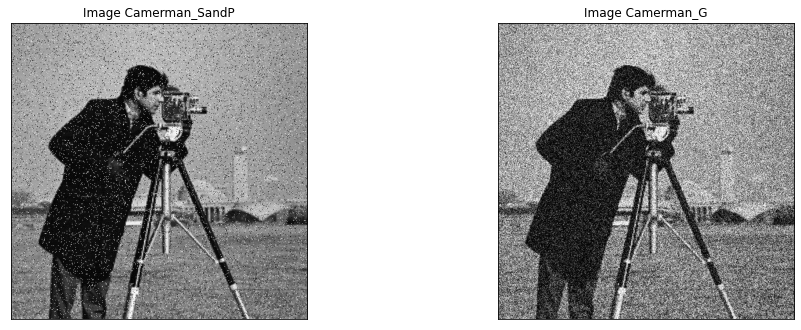

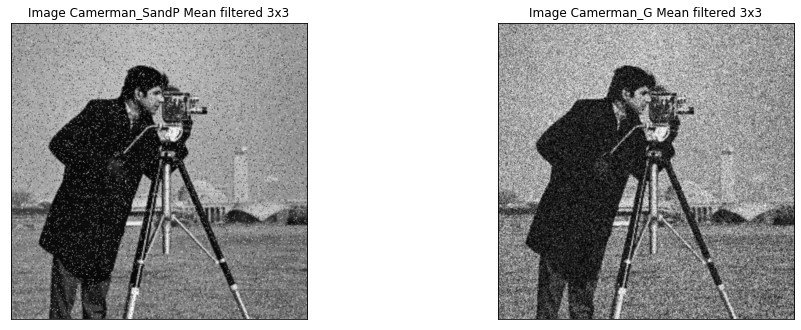

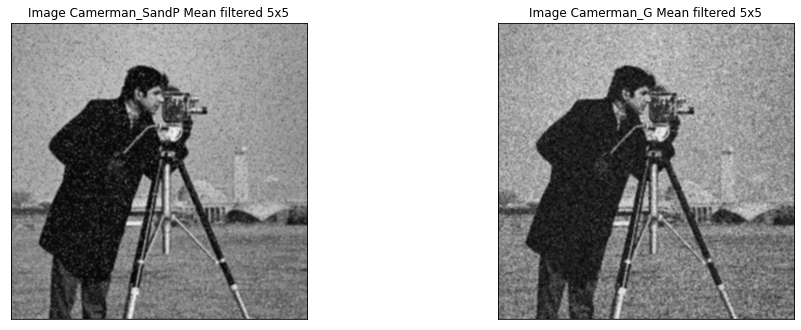

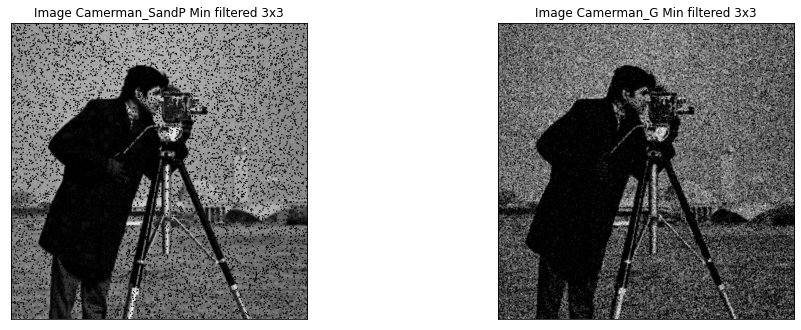

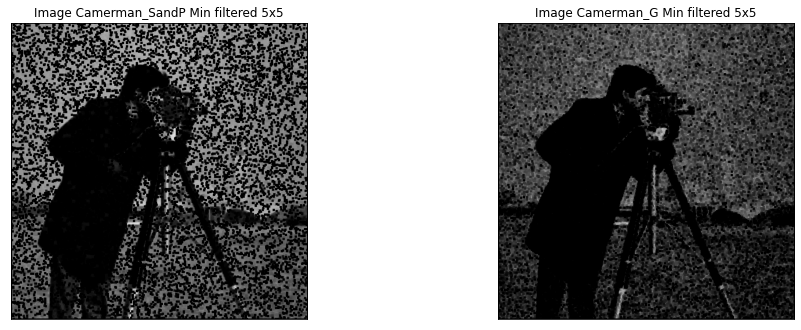

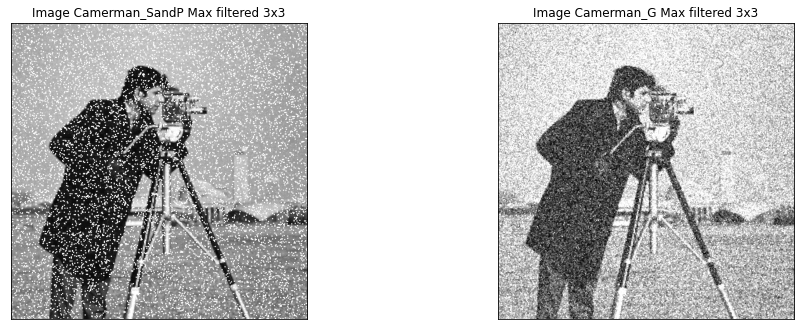

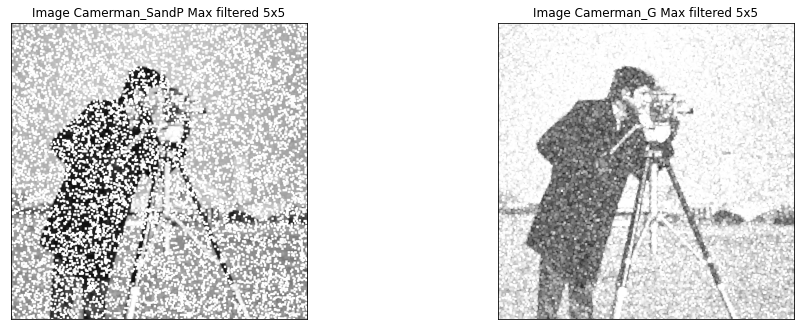

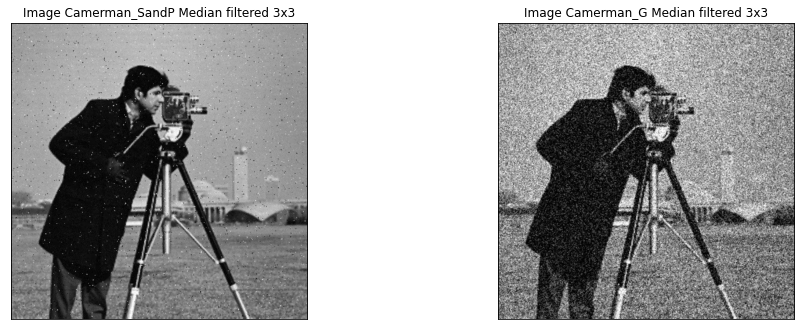

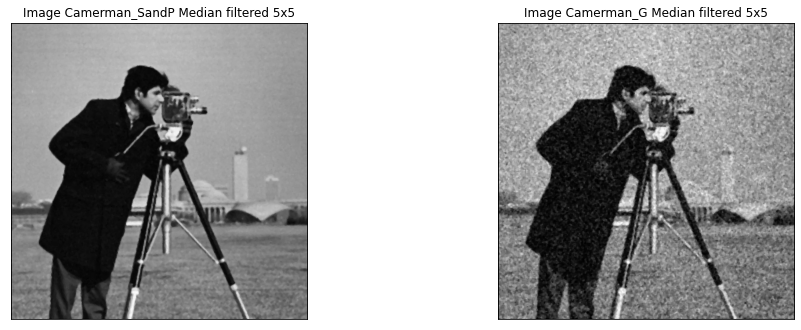

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#YOUR CODE STARTS HERE
def mean_filter(im, size_filter):
    pad_size = int(size_filter/2)
    img_new = np.zeros(im.shape, dtype='uint8')
    image = cv2.copyMakeBorder( im, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)  #padding  with black border
    rows = image.shape[0]                          #total rows in padded image
    cols = image.shape[1]                          #total cols in padded image
    rows_end = rows - pad_size                     
    cols_end = cols - pad_size
    
    for i in range(pad_size, rows_end):         
        for j in range(pad_size, cols_end):
            sub_mat = image[i-pad_size:i+pad_size,j-pad_size:j+pad_size]  #sub matrix to get corresponding neighbours to apply filter
            mean_val = np.mean(sub_mat)                                   # applying mean filter
            img_new[i-pad_size][j-pad_size] = mean_val                    # storing the filtered value
    return img_new

def max_filter(im, size_filter):
    pad_size = int(size_filter/2)
    img_new = np.zeros(im.shape, dtype='uint8')
    image = cv2.copyMakeBorder( im, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)
    rows = image.shape[0]
    cols = image.shape[1]
    rows_end = rows - pad_size
    cols_end = cols - pad_size
    for i in range(pad_size, rows_end):
        for j in range(pad_size, cols_end):
            sub_mat = image[i-pad_size:i+pad_size,j-pad_size:j+pad_size]    #sub matrix to get corresponding neighbours to apply filter
            max_val = np.max(sub_mat)                                       # applying max filter
            img_new[i-pad_size][j-pad_size] = max_val                       # storing the filtered value
    return img_new

def min_filter(im, size_filter):
    pad_size = int(size_filter/2)
    img_new = np.zeros(im.shape, dtype='uint8')
    image = cv2.copyMakeBorder( im, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)
    rows = image.shape[0]
    cols = image.shape[1]
    rows_end = rows - pad_size
    cols_end = cols - pad_size
    for i in range(pad_size, rows_end):
        for j in range(pad_size, cols_end):
            sub_mat = image[i-pad_size:i+pad_size,j-pad_size:j+pad_size]     #sub matrix to get corresponding neighbours to apply filter
            min_val = np.min(sub_mat)                                        # applying min filter
            img_new[i-pad_size][j-pad_size] = min_val                        # storing the filtered value
    return img_new

def median_filter(im, size_filter):
    pad_size = int(size_filter/2)
    img_new = np.zeros(im.shape, dtype='uint8')
    image = cv2.copyMakeBorder( im, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)
    rows = image.shape[0]
    cols = image.shape[1]
    rows_end = rows - pad_size
    cols_end = cols - pad_size
    for i in range(pad_size, rows_end):
        for j in range(pad_size, cols_end):
            sub_mat = image[i-pad_size:i+pad_size,j-pad_size:j+pad_size]         #sub matrix to get corresponding neighbours to apply filter
            median_val = np.median(sub_mat)                                      # applying median filter
            img_new[i-pad_size][j-pad_size] = median_val                         # storing the filtered value
    return img_new
    

img1 = cv2.imread("Cameraman_SandP_0.08.jpg")
img2 = cv2.imread("Camerman_G_0.05.jpg")
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
im11 = mean_filter(img1_gray, 3)
im12 = mean_filter(img1_gray, 5)
im13 = min_filter(img1_gray, 3)
im14 = min_filter(img1_gray, 5)
im15 = max_filter(img1_gray, 3)
im16 = max_filter(img1_gray, 5)
im17 = median_filter(img1_gray, 3)
im18 = median_filter(img1_gray, 5)

im21 = mean_filter(img2_gray, 3)
im22 = mean_filter(img2_gray, 5)
im23 = min_filter(img2_gray, 3)
im24 = min_filter(img2_gray, 5)
im25 = max_filter(img2_gray, 3)
im26 = max_filter(img2_gray, 5)
im27 = median_filter(img2_gray, 3)
im28 = median_filter(img2_gray, 5)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
im11 = cv2.cvtColor(im11, cv2.COLOR_BGR2RGB)
im12 = cv2.cvtColor(im12, cv2.COLOR_BGR2RGB)
im13 = cv2.cvtColor(im13, cv2.COLOR_BGR2RGB)
im14 = cv2.cvtColor(im14, cv2.COLOR_BGR2RGB)
im15 = cv2.cvtColor(im15, cv2.COLOR_BGR2RGB)
im16 = cv2.cvtColor(im16, cv2.COLOR_BGR2RGB)
im17 = cv2.cvtColor(im17, cv2.COLOR_BGR2RGB)
im18 = cv2.cvtColor(im18, cv2.COLOR_BGR2RGB)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
im21 = cv2.cvtColor(im21, cv2.COLOR_BGR2RGB)
im22 = cv2.cvtColor(im22, cv2.COLOR_BGR2RGB)
im23 = cv2.cvtColor(im23, cv2.COLOR_BGR2RGB)
im24 = cv2.cvtColor(im24, cv2.COLOR_BGR2RGB)
im25 = cv2.cvtColor(im25, cv2.COLOR_BGR2RGB)
im26 = cv2.cvtColor(im26, cv2.COLOR_BGR2RGB)
im27 = cv2.cvtColor(im27, cv2.COLOR_BGR2RGB)
im28 = cv2.cvtColor(im28, cv2.COLOR_BGR2RGB)



plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(img1)
plt.title('Image Camerman_SandP')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img2)
plt.title('Image Camerman_G')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(im11)
plt.title('Image Camerman_SandP Mean filtered 3x3')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(im21)
plt.title('Image Camerman_G Mean filtered 3x3')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(im12)
plt.title('Image Camerman_SandP Mean filtered 5x5')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(im22)
plt.title('Image Camerman_G Mean filtered 5x5')
plt.xticks([])
plt.yticks([])



plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(im13)
plt.title('Image Camerman_SandP Min filtered 3x3')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(im23)
plt.title('Image Camerman_G Min filtered 3x3')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.imshow(im14)
plt.title('Image Camerman_SandP Min filtered 5x5')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(im24)
plt.title('Image Camerman_G Min filtered 5x5')
plt.xticks([])
plt.yticks([])


plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.imshow(im15)
plt.title('Image Camerman_SandP Max filtered 3x3')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(im25)
plt.title('Image Camerman_G Max filtered 3x3')
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(im16)
plt.title('Image Camerman_SandP Max filtered 5x5')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(im26)
plt.title('Image Camerman_G Max filtered 5x5')
plt.xticks([])
plt.yticks([])



plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
plt.imshow(im17)
plt.title('Image Camerman_SandP Median filtered 3x3')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(im27)
plt.title('Image Camerman_G Median filtered 3x3')
plt.xticks([])
plt.yticks([])


plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.imshow(im18)
plt.title('Image Camerman_SandP Median filtered 5x5')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2)
plt.imshow(im28)
plt.title('Image Camerman_G Median filtered 5x5')
plt.xticks([])
plt.yticks([])




#YOUR CODE ENDS HERE